In [1]:
# Maount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


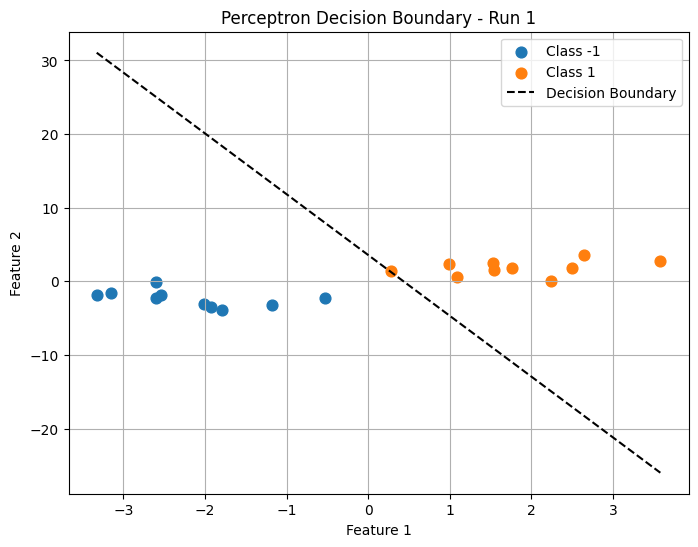

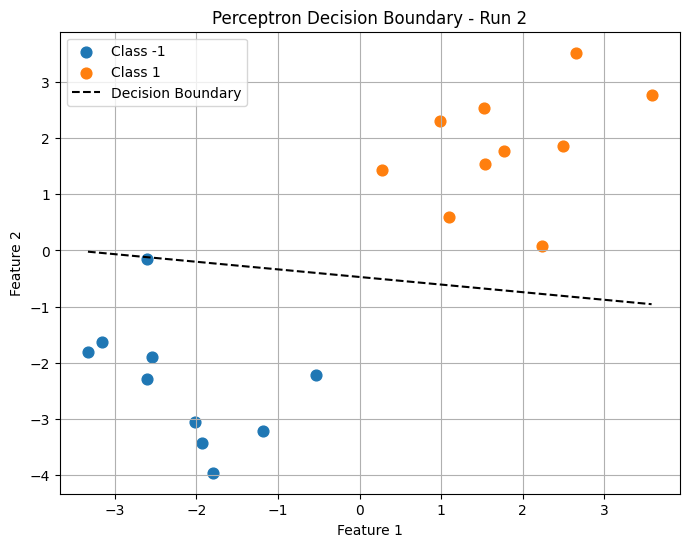

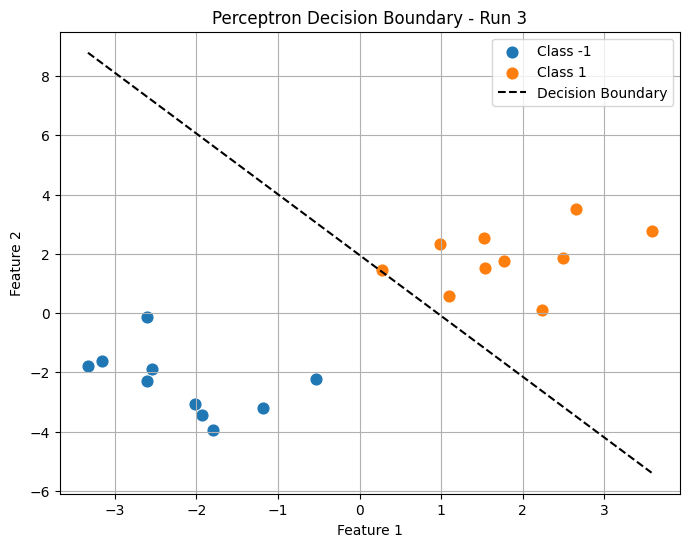

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/EE708/A4_P1.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

# Add bias term (x0 = 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))

def step_function(x):
    return np.where(x >= 0, 1, -1)

def perceptron_train(X, y, learning_rate=0.01, iterations=20):
    np.random.seed()  # random seed each time
    weights = np.random.randn(X.shape[1])
    for epoch in range(iterations):
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights)
            y_pred = step_function(z)
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
    return weights

def plot_decision_boundary(X, y, weights, title):
    plt.figure(figsize=(8, 6))

    # Plot data points
    for label in np.unique(y):
        plt.scatter(X[y == label][:, 1], X[y == label][:, 2], label=f"Class {label}", s=60)

    # Decision boundary
    x_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and visualize multiple times to show effect of initialization
for run in range(3):
    weights = perceptron_train(X, y, learning_rate=0.01, iterations=20)
    plot_decision_boundary(X, y, weights, f"Perceptron Decision Boundary - Run {run + 1}")


Test Accuracy: 1.0000


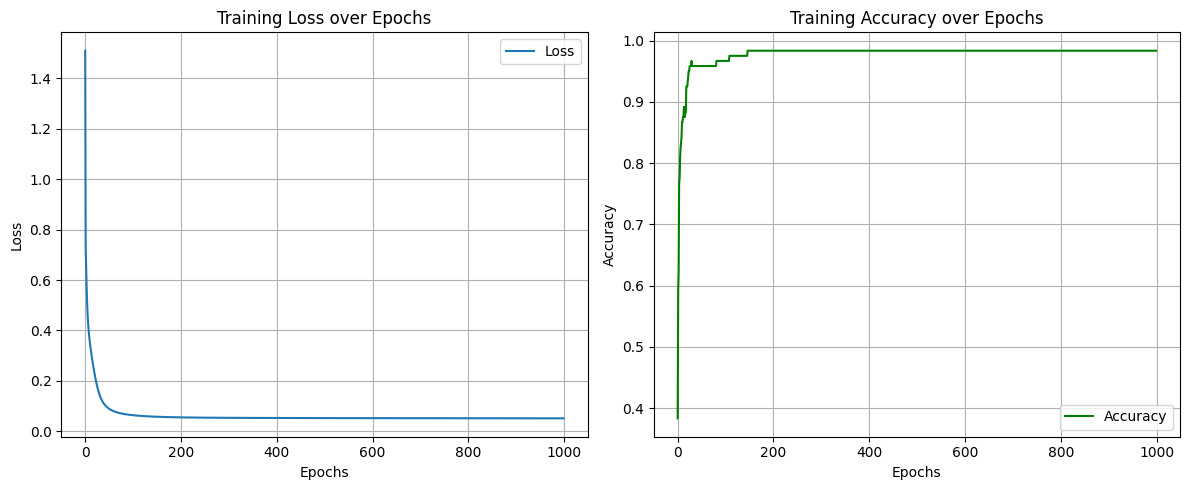

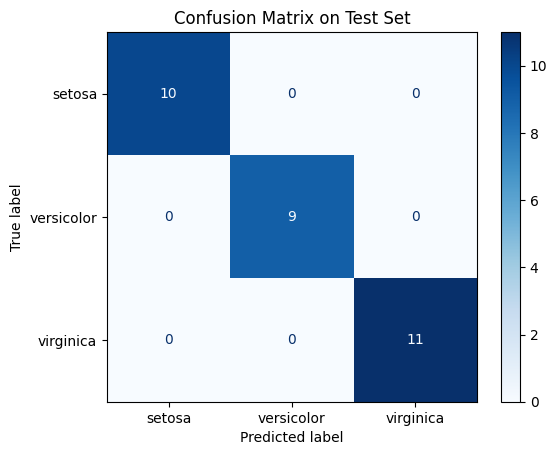

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Architecture
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Weight and bias initialization
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

# Track loss and accuracy
loss_list = []
acc_list = []

# Training using SGD
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0

    for i in range(X_train.shape[0]):
        xi = X_train[i:i+1]
        yi = y_train[i:i+1]

        # Forward pass
        z1 = np.dot(xi, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_pred = softmax(z2)

        # Loss
        loss = -np.sum(yi * np.log(y_pred + 1e-8))  # cross-entropy like
        epoch_loss += loss

        # Accuracy
        if np.argmax(y_pred) == np.argmax(yi):
            correct += 1

        # Backward pass
        error_output = y_pred - yi
        dW2 = np.dot(a1.T, error_output)
        db2 = error_output

        error_hidden = np.dot(error_output, W2.T) * relu_derivative(z1)
        dW1 = np.dot(xi.T, error_hidden)
        db1 = error_hidden

        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Save epoch loss and accuracy
    loss_list.append(epoch_loss / X_train.shape[0])
    acc_list.append(correct / X_train.shape[0])

# Test the model
z1_test = np.dot(X_test, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
y_test_pred = softmax(z2_test)

# Calculate final test accuracy
test_accuracy = np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(acc_list, label='Accuracy', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_test_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()
